<a href="https://colab.research.google.com/github/Alexatap/Actividadmapa.github.io/blob/main/Proyecto_Final_CreditosICETEX_Diana_Alexandra_Tavera_Penagos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRÉDITOS OTORGADOS POR EL ICETEX - COMPORTAMIENTO DE LA CARTERA** **PERIODO DE 2015 A 2023**

A continuación se presenta el análisis de las databases "Comportamiento de cartera y credito educativo" y "Créditos otorgados por el Icetex".

1) Una vez realizada la limpieza de datos, continuamos con el cargue de las bases de datos a Google Colab.

In [ ]:
from google.colab import files

# Upload the first Excel file
print("Upload the first Excel file (.xlsx)")
uploaded1 = files.upload()


Upload the first Excel file (.xlsx)


In [ ]:
# Upload the second Excel file
print("Upload the second Excel file (.xlsx)")
uploaded2 = files.upload()


Upload the second Excel file (.xlsx)


Saving creditos_otorgados_icetex.xlsx to creditos_otorgados_icetex (2).xlsx


2) Se instala la biblioteca **Pandas** y se confirma que las dos databases han sido cargadas correctamente.

In [ ]:
import pandas as pd

# Load the Excel files into DataFrames
df1 = pd.read_excel(next(iter(uploaded1)))
df2 = pd.read_excel(next(iter(uploaded2)))

# Display the first few rows of each DataFrame to confirm the load
print("First DataFrame (df1):")
print(df1.head())

print("Second DataFrame (df2):")
print(df2.head())


First DataFrame (df1):
  FECHA CORTE DEPARTAMENTO  CANTIDAD CREDITOS AL DIA  \
0  2022-03-31       VAUPES                         0   
1  2022-03-31      VICHADA                        19   
2  2022-03-31        SUCRE                      3355   
3  2022-03-31      GUAINIA                        46   
4  2022-03-31     AMAZONAS                       106   

   CANTIDAD CREDITOS CON MORA MENOR A 90 DIAS  \
0                                           1   
1                                          12   
2                                        1954   
3                                          24   
4                                          54   

   CANTIDAD CREDITOS MORA MAYOR A 90 DIAS  TOTAL CREDITOS  SALDO CAPITAL  \
0                                       2               3       14629091   
1                                      15              46      554822061   
2                                    1951            7260    75700773505   
3                                      14

In [ ]:
# Merge the two DataFrames
# Assuming both tables have a common column called 'DEPARTAMENTO'
merged_df = pd.merge(df1, df2, on='DEPARTAMENTO')

# Display the first few rows of the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.head())



Merged DataFrame:
  FECHA CORTE DEPARTAMENTO  CANTIDAD CREDITOS AL DIA  \
0  2022-03-31      VICHADA                        19   
1  2022-03-31      VICHADA                        19   
2  2022-03-31      VICHADA                        19   
3  2022-03-31      VICHADA                        19   
4  2022-03-31      VICHADA                        19   

   CANTIDAD CREDITOS CON MORA MENOR A 90 DIAS  \
0                                          12   
1                                          12   
2                                          12   
3                                          12   
4                                          12   

   CANTIDAD CREDITOS MORA MAYOR A 90 DIAS  TOTAL CREDITOS  SALDO CAPITAL  \
0                                      15              46      554822061   
1                                      15              46      554822061   
2                                      15              46      554822061   
3                                      15    

In [ ]:
print(df1.columns)
print(df2.columns)

Index(['FECHA CORTE', 'DEPARTAMENTO', 'CANTIDAD CREDITOS AL DIA',
       'CANTIDAD CREDITOS CON MORA MENOR A 90 DIAS',
       'CANTIDAD CREDITOS MORA MAYOR A 90 DIAS', 'TOTAL CREDITOS',
       'SALDO CAPITAL', 'SALDO TOTAL', 'SALDO MORA',
       'INDICADOR CARTERA VENCIDA', 'EPOCA CARTERA'],
      dtype='object')
Index(['VIGENCIA', 'PERIODO OTORGAMIENTO', 'SEXO AL NACER',
       'ESTRATO SOCIOECONÓMICO', 'CÓDIGO DEDEPARTAMENTO DE ORIGEN',
       'DEPARTAMENTO', 'CATEGORÍA DEL MUNICIPIO DE ORIGEN', 'SECTOR IES',
       'NIVEL DE FORMACIÓN', 'MODALIDAD DE LÍNEA', 'MODALIDAD DEL CRÉDITO',
       'RANGO DEL VALOR TOTAL DESEMBOLSADO',
       'NÚMERO DE NUEVOS BENEFICIARIOS DE CRÉDITO'],
      dtype='object')


3) Se instala la biblioteca **matplotlib*, esto nos será util porque nos permitirá crear gráficos de dispersión, histogramas, entre otros. Esto nos permitirá presentar la información para analizarla de manera efectiva.

4) Realizamos un diagrama de dispersión, por medio del cual se observa dentro del conjunto de datos, la variable X son los departamentos y la variable Y el total de créditos otorgados por departamento. La disposición de los puntos en el gráfico revela los patrones o la falta de relación entre las dos variables.

*   Se observa que en el caso de departamentos como Guaviare, Amazonas y Vaupes, son los que tienen menos cantidad de crédito aprobados.  
*   Mientras que departamentos como Valle del cauca son los que mayor cantidad tienen.



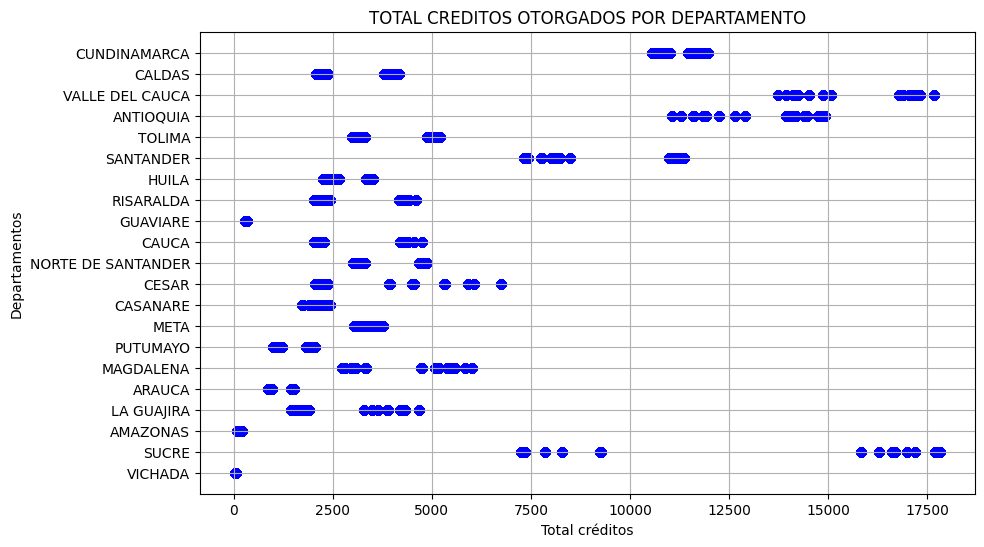

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['TOTAL CREDITOS'], merged_df['DEPARTAMENTO'], color='blue', alpha=0.5)
plt.title('TOTAL CREDITOS OTORGADOS POR DEPARTAMENTO')
plt.xlabel('Total créditos')
plt.ylabel('Departamentos')
plt.grid(True)
plt.show()


5) Con la siguiente grafica un **histograma** podremos comprender la distribución de los créditos otorgados por el Icetex que se encuentran al dia por cada departamento.

*   Departamentos como Antioquie, Valle del Cauca y Santander tienen sus créditos al día, demostrando que tienen buenos habitos de pago.
*   Mientras que departamentos como Amazonas, Guaviare y Vaupes, al ser los que menos créditos otorgados tienen, sus créditos al día



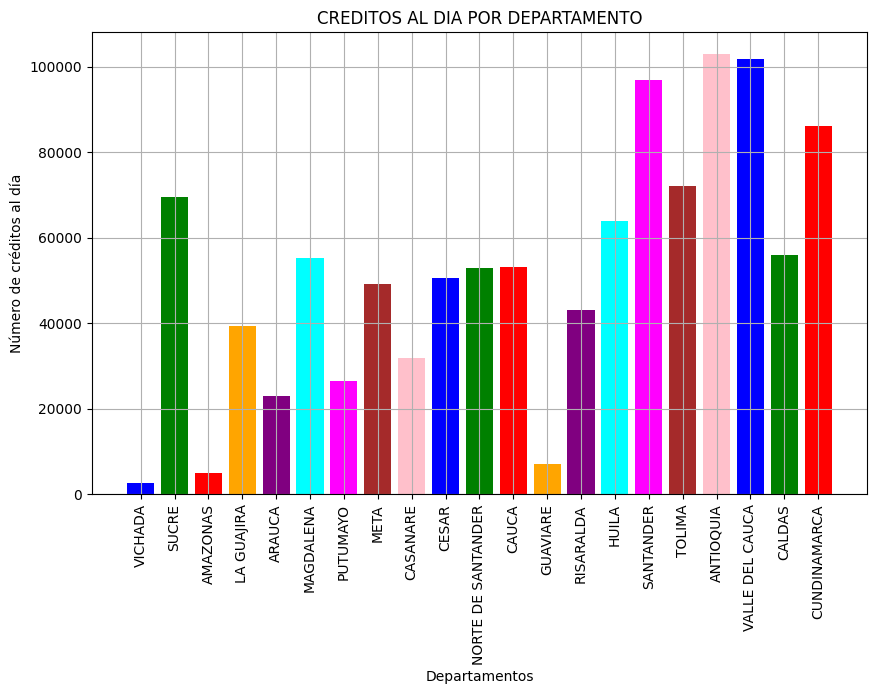

In [ ]:
import matplotlib.pyplot as plt

unique_deptos = merged_df['DEPARTAMENTO'].unique()
plt.figure(figsize=(10, 6))
for i in range(len(unique_deptos)):
    plt.bar(unique_deptos[i], merged_df['DEPARTAMENTO'].value_counts()[unique_deptos[i]], color=colors[i % len(colors)])
plt.title('CREDITOS AL DIA POR DEPARTAMENTO')
plt.xlabel('Departamentos')
plt.ylabel('Número de créditos al día')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


6) Por medio de un diagrama de Torta en el que se relacionan los créditos otorgados por cada vigencia desde el periodo 2015 al 2023. Con lo anterior se puede observar que el año 2023 fue el año en el que más se otorgaron créditos con un 14.1%, mientras que el año 2018 fue el que menos créditos fueron otorgados.

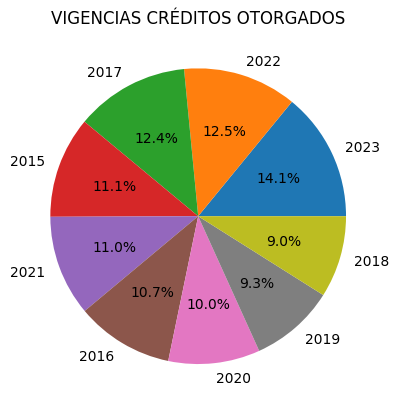

In [ ]:
categorias = df2['VIGENCIA']

sizes = categorias.value_counts()
labels = sizes.index.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('VIGENCIAS CRÉDITOS OTORGADOS')
plt.show()

7) Observando el histograma en el que se estudia la relación entre los créditos otorgados con el nivel de formación. Y se puede observar que el mayor porcentaje de créditos otorgados se dan para adelantar pregrados universitarios.

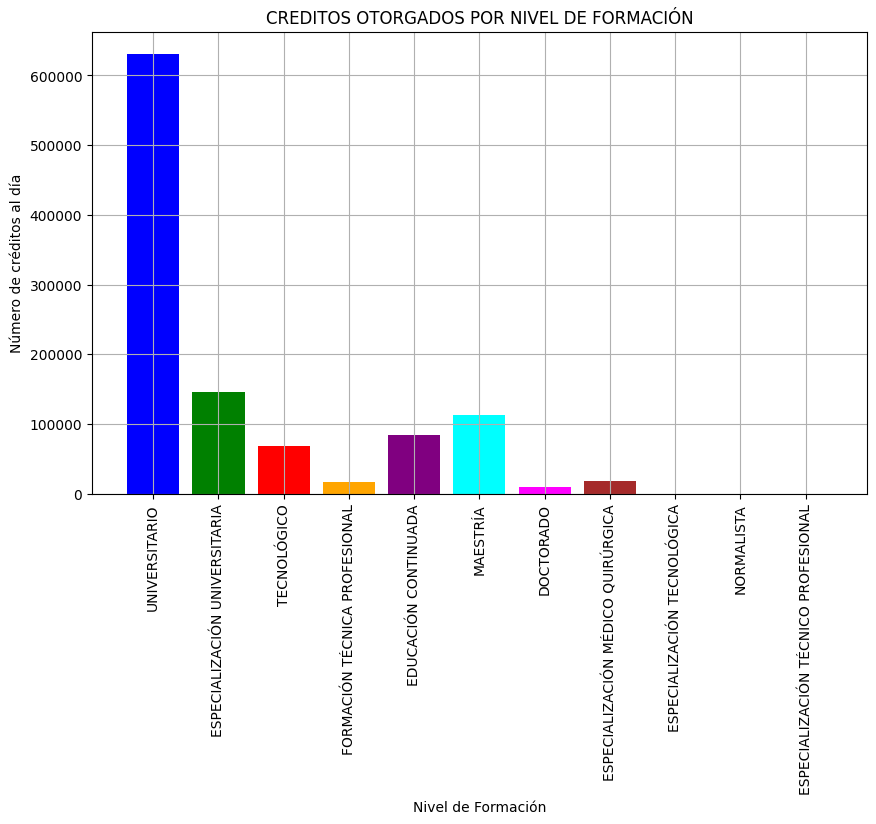

In [ ]:
unique_deptos = merged_df['NIVEL DE FORMACIÓN'].unique()
plt.figure(figsize=(10, 6))
for i in range(len(unique_deptos)):
    plt.bar(unique_deptos[i], merged_df['NIVEL DE FORMACIÓN'].value_counts()[unique_deptos[i]], color=colors[i % len(colors)])
plt.title('CREDITOS OTORGADOS POR NIVEL DE FORMACIÓN')
plt.xlabel('Nivel de Formación')
plt.ylabel('Número de créditos al día')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

8) Al revisar en que epoca se encuentra la cartera que tiene actualmente el ICETEX, se puede observar que existe prácticamente el mismo porcentaje de créditos que se encuentran en epoca de estudios, es decir, los beneficiarios de dichos créditos se encuentran cursando actualmente su programa acádemico. Con los que se encuentra en etapa de amortización, es decir, estudiantes que ya terminarón sus estudios y deben empezar a devolver el préstamo al ICETEX.

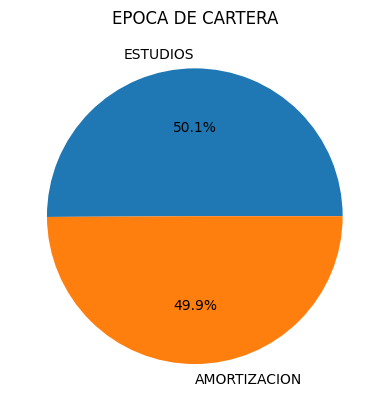

In [ ]:
categorias = df1['EPOCA CARTERA']

sizes = categorias.value_counts()
labels = sizes.index.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('EPOCA DE CARTERA')
plt.show()